In [1]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

import env

## Clustering - DBSCAN
### 1) Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.

## Acquire

In [2]:
# Acquiring the url from Codeup Data Science sql server and turning it into a dataframe
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/grocery_db'

query = '''
SELECT * FROM grocery_customers
     
'''
df = pd.read_sql(query, url)

In [3]:
# let's examine the head of the dataframe
df.head(2)

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776


In [4]:
# sanity check for the shape of the df:
df.shape

(440, 9)

In [5]:
#checking the dataframe for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customer_id       440 non-null    int64
 1   Channel           440 non-null    int64
 2   Region            440 non-null    int64
 3   Fresh             440 non-null    int64
 4   Milk              440 non-null    int64
 5   Grocery           440 non-null    int64
 6   Frozen            440 non-null    int64
 7   Detergents_Paper  440 non-null    int64
 8   Delicassen        440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


## Prepare

In [6]:
grocery = pd.read_sql(query, url)

In [7]:
# Cluster on all or a selected subset of features
grocery_milk_fresh = grocery[["Grocery", "Milk", "Fresh"]]
grocery_milk_fresh.head(2)


,Grocery,Milk,Fresh
0,7561,9656,12669
1,9568,9810,7057


In [8]:
# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(grocery_milk_fresh)

# Use the scaler
grocery_milk_fresh = scaler.transform(grocery_milk_fresh)
grocery_milk_fresh


array([[0.08146416, 0.13072723, 0.11294004],
       [0.10309667, 0.13282409, 0.06289903],
       [0.08278992, 0.11918086, 0.05662161],
       ...,
       [0.32594285, 0.21013575, 0.1295431 ],
       [0.02402535, 0.02622442, 0.091727  ],
       [0.02702178, 0.02237109, 0.02482434]])

In [9]:
#after splitting now we can create a DBSCAN model by creating the object first
# Make the object
dbsc = DBSCAN(eps = .10, min_samples = 20)

# Fit the object
dbsc.fit(grocery_milk_fresh)


DBSCAN(eps=0.1, min_samples=20)

In [10]:
# Now, let's add the scaled value columns back onto the dataframe
columns = ["Grocery", "Milk", "Fresh"]
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(grocery , columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
#df = df.merge(grocery , on=df.index)
#df = df.drop(columns=['key_0'])
df.head()


,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
# Now, let's add the scaled value columns back onto the dataframe
columns = ["Grocery", "Milk", "Fresh"]
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(grocery_milk_fresh, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
#df = df.merge(scaled_df, on=df.index)
#df = df.drop(columns=['key_0'])
df.head()


,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
# Get labels from cluster model

df['labels'] = dbsc.labels_
# Count
df.labels.value_counts()

 0    409
-1     31
Name: labels, dtype: int64

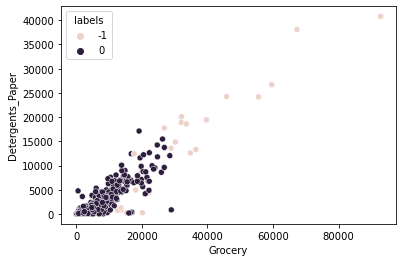

In [13]:
sns.scatterplot(df.Grocery, df.Detergents_Paper, hue = df.labels)
plt.show()



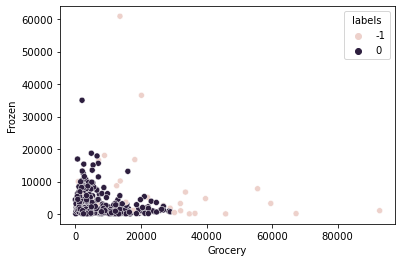

In [14]:
sns.scatterplot(df.Grocery, df.Frozen, hue = df.labels)
plt.show()

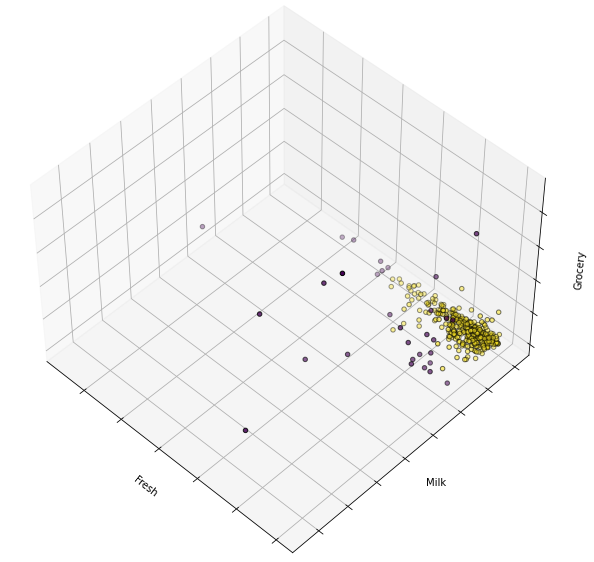

In [15]:
# Now let's plot the results
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Fresh, df.Milk, df.Grocery,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')
plt.show()

## 2) Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.

## Acquire

In [18]:
# Acquiring the url from Codeup Data Science sql server and turning it into a dataframe
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/curriculum_logs'

query = '''
SELECT date,
       path,
       user_id,
       cohort_id,
       ip as source_ip
FROM logs;
'''
df = pd.read_sql(query, url)

In [19]:
#let us examine the head of the dataframe
df.head()

,date,path,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       900223 non-null  object 
 1   path       900222 non-null  object 
 2   user_id    900223 non-null  int64  
 3   cohort_id  847330 non-null  float64
 4   source_ip  900223 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 34.3+ MB


In [21]:
# let us aggregate the data to get the total unique values for date and cohort_id.
id_counts = df.groupby('user_id')[['date','path','cohort_id']].nunique()
id_counts


,date,path,cohort_id
user_id,,,
1,637,976,2
2,83,151,1
3,107,169,1
4,54,143,1
5,82,197,1
...,...,...,...
977,10,12,1
978,9,18,1
979,9,20,1


In [22]:
# let us scale the data before building the DBSCAN model.
scaler = MinMaxScaler()
id_counts_scaled = pd.DataFrame(scaler.fit_transform(id_counts), columns = id_counts.columns)
id_counts_scaled.head()

,date,path,cohort_id
0,0.768116,1.000000,0.666667
1,0.099034,0.153846,0.333333
2,0.128019,0.172308,0.333333
3,0.064010,0.145641,0.333333
4,0.097826,0.201026,0.333333


In [23]:
# Now we can use DBSCAN to find anomolies in the id_counts dataframe.
db_scan = DBSCAN(eps = 0.1, min_samples = 5)
db_scan.fit(id_counts_scaled)

DBSCAN(eps=0.1)

In [24]:
# then we assign the labels created by DBSCAN to the id_counts dataframe.
id_counts['labels'] = db_scan.labels_

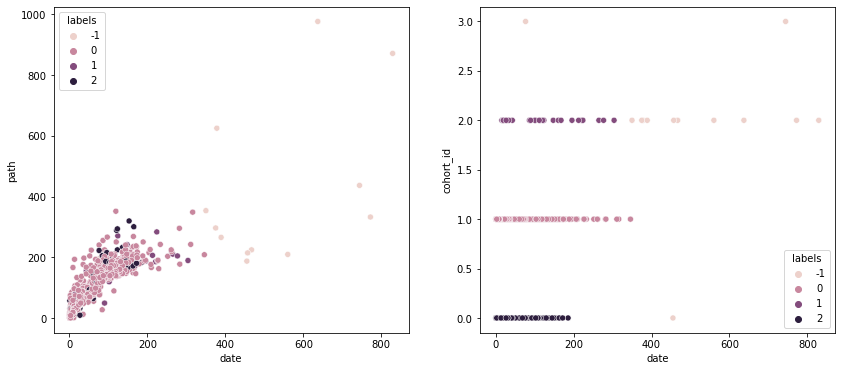

In [25]:
# plot to see the results.
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (14, 6))

sns.scatterplot(data = id_counts, x = 'date', y = 'path', hue = 'labels', ax = ax[0])
sns.scatterplot(data = id_counts, x = 'date', y = 'cohort_id', hue = 'labels', ax = ax[1]);

In [ ]:
#We can observe that many users accessed many different curriculum pages on many different dates.